## Principal Component Analysis

PCA'yı ne zaman kullanmalıyım?

Değişkenlerin sayısını azaltmak istiyor, ancak dikkate alınmadan tamamen kaldırılacak değişkenleri 
tanımlayamıyor musunuz?

Değişkenlerinizin birbirinden bağımsız olduğundan emin olmak ister misiniz?

Bağımsız değişkenlerinizi daha az yorumlanabilir hale getirmek konusunda rahat mısınız?

Üç soruya da “evet” yanıtı verdiyseniz, PCA kullanmak için iyi bir yöntemdir. Söz 3 “hayır” cevabı 
verdiyseniz, olmamalıdır PCA kullanın.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cancer_tumor_data_features.csv")

<IPython.core.display.Javascript object>

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 30)

## PCA With Sklearn

In [5]:
# PCA hem unsupervised hem de supervised modeller için kullanılabilir
# PCA her zaman scale edilmiş data ile çalışır.

### Scaling Data

PCA uses Euclidean distance as its feature vector similarity metric, so make sure we scale the features before applying PCA.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaled_X = scaler.fit_transform(df)

<IPython.core.display.Javascript object>

<AxesSubplot:>

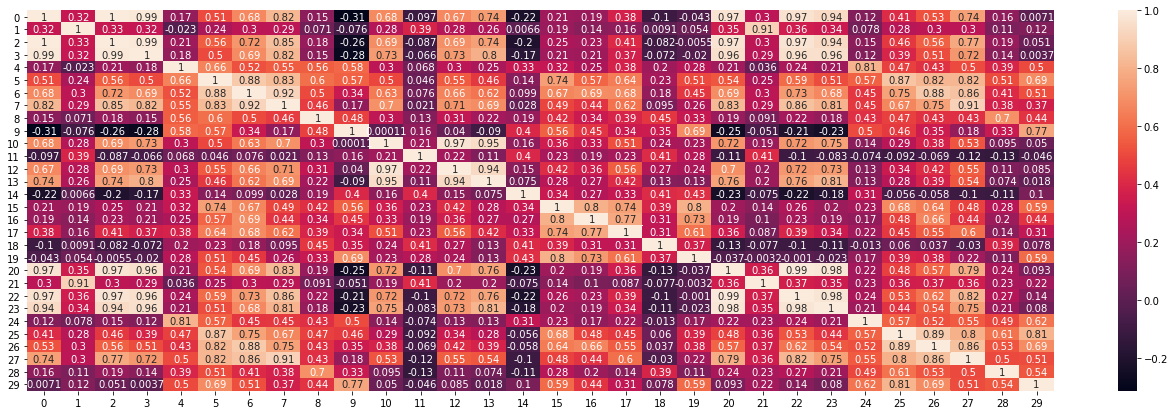

In [9]:
df_scaled_X = pd.DataFrame(scaled_X)
plt.figure(figsize = (23, 7))
sns.heatmap(df_scaled_X.corr(), annot = True)
# PCA arka planda featuresların linear ilişki (correlation) bakarak gruplama yapıyor.
# PCA tarafından oluşturulan component (grup) lere bütün features ların etkisi vardır sadece katkı katsayısı değişir.

### PCA

PCA, verilerimizdeki önemli ilişkileri tanımlayan , mevcut verileri bu ilişkilere dayalı olarak dönüştüren ve daha sonra en önemli ilişkileri koruyabilmemiz ve diğerlerini ihmal edebilmemiz/silmemiz için bu ilişkilerin önemini nicelleştiren/sayısallaştıran bir boyutluluk indirgemedir .

In [10]:
from sklearn.decomposition import PCA
# öz vektör =  eigen vector

Veri kümesini alın

Verilerin kovaryans matrisini hesaplayın

Kovaryans matrisi üzerinden özdeğerleri ve özvektörleri hesaplayın

Temel bileşenleri seçin

Seçilen bileşenlerden yeni özellikli veri kümesi oluşturun

In [11]:
pca = PCA(n_components=2)

In [12]:
principal_components = pca.fit_transform(scaled_X)

In [13]:
component_df = pd.DataFrame(data = principal_components, columns = ["first_component",
                                                                    "second_component"])
component_df
# Component sayısı arttıkça features ların component lere etkisi azalır. En fazla etki ilk component tedir. 

<IPython.core.display.Javascript object>

,first_component,second_component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [14]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [15]:
pca.components_[0]
# 0 cı öz vektör
# ilk companent'de tüm featurelardaki maksimum variance'ın yönünü temsil ederler.

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

In [16]:
pca.components_[1] 
# Component imizin öz vektörlerine bakıyoruz.

array([-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
        0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
       -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
        0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
       -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
        0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947])

In [17]:
scaled_X[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [18]:
(scaled_X[0]*pca.components_[0]).sum() 
# Bir component e bütün features ların etkisini kanıtlamak için bunu kullandık. 

9.19283682621325

In [19]:
(scaled_X[1]*pca.components_[1]).sum()

-3.768171742069919

### Corr Between Components

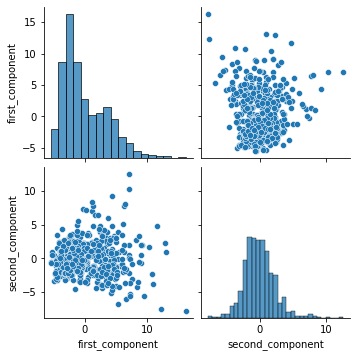

In [20]:
sns.pairplot(component_df)

In [21]:
component_df.corr().round()
# PCA nın oluşturduğu component lar birbirine dik olarak oluşturulduğu için component ler arasındaki correlation 0 (sıfır) dır. 

,first_component,second_component
first_component,1.0,0.0
second_component,0.0,1.0


### Finding Optimal Number Of Components

In [22]:
pca.explained_variance_ratio_
# explained_variance_ratio_ datasetinin taşıdığı bilgi seviyesi. 
# Burada ilk bileşen 0.442, ikinci bileşen (componenet) ise 0.189 oranında orjinal data setinin verisini barındırıyor.
# Toplamda 0.442+0.189 oranında bilgi barındırılıyor.
# 40 kilo narımızı sıkarak 10 kilo nar suyu elde ettik ama vitamin ve minarallerin %70 i hala elimizde. Sadece ağırlığı azaltık. PCA da tam olarak bunu yapıyor. Yani burada elimizde yaklaşık %60 veri var %40 kayıp demek doğru olmaz biz sadece ağırlığı (boyutu) azaltıyoruz.

array([0.44272026, 0.18971182])

In [23]:
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208])

Text(0, 0.5, 'Variance Ratio')

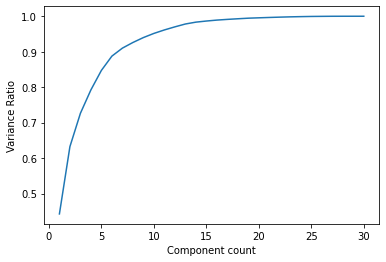

In [24]:
pca = PCA().fit(scaled_X)
x = range(1,31)
plt.plot(x,np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio")
# Kaç bileşen oluşturacağımızı Variance Ratio (y ekseni) bakarak seçim yapmalıyız. Fakat buradaki yüzdelikler (y ekseninde) tam olarak bilginin açıklanabilirliğini göstermiyor. Çünkü bilginin büyük bir çoğunluğu zaten tutuluyor.

In [25]:
pca = PCA(n_components=30)

In [26]:
principal_components = pca.fit_transform(scaled_X)

In [27]:
my_dict = {"explained_variance":pca.explained_variance_,
        "explained_variance_ratio":pca.explained_variance_ratio_,
        "cumsum_explained_variance_ratio":pca.explained_variance_ratio_.cumsum()}

In [28]:
pd.DataFrame(my_dict, index = range(1,31))

<IPython.core.display.Javascript object>

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,13.304991,0.442720,0.442720
2,5.701375,0.189712,0.632432
3,2.822910,0.093932,0.726364
4,1.984128,0.066021,0.792385
5,1.651633,0.054958,0.847343
6,1.209482,0.040245,0.887588
7,0.676409,0.022507,0.910095
8,0.477456,0.015887,0.925983
9,0.417629,0.013896,0.939879
10,0.351311,0.011690,0.951569


### Interpreting PCA Results

In [29]:
scaled_df = pd.DataFrame(scaled_X, columns = df.columns)

<IPython.core.display.Javascript object>

In [30]:
combined_df = pd.concat([component_df, scaled_df], axis=1)
correlation = combined_df.corr()

<IPython.core.display.Javascript object>

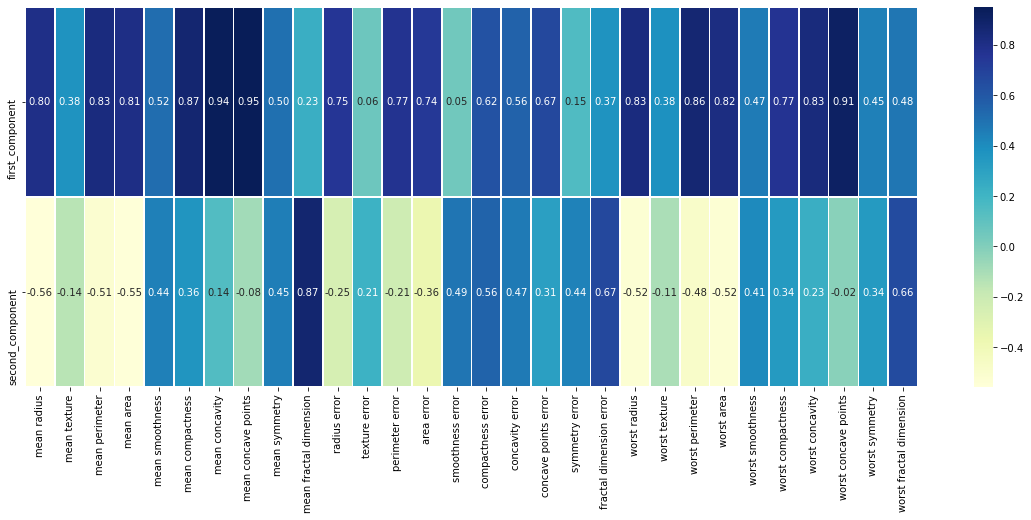

In [31]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation.iloc[:2,2:], cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()
# Burada datamızdaki features ların oluşturulan component lere etkisini gözlemliyoruz ve hangi features ların daha önemli olduğunu belirliyoruz.
# Koyu renkli features lar doğru orantılı açık renkli features lar ters orantılı. Koyu renkli features lardan birisi artarsa diğerleri (koyu renkli) de artma eğilimin de diyebiliriz.
# Burada ki data setimize göre koyu renkli featureslar kanserin teşhisi için önemli features lar
# İlk bileşenimiz kanserin varlığını, ikinci bileşen ise kanserin olmadığını gösteriyor. Çünkü bu iki component (bileşen) arasındaki correlation sıfırdır. 

<IPython.core.display.Javascript object>

<AxesSubplot:>

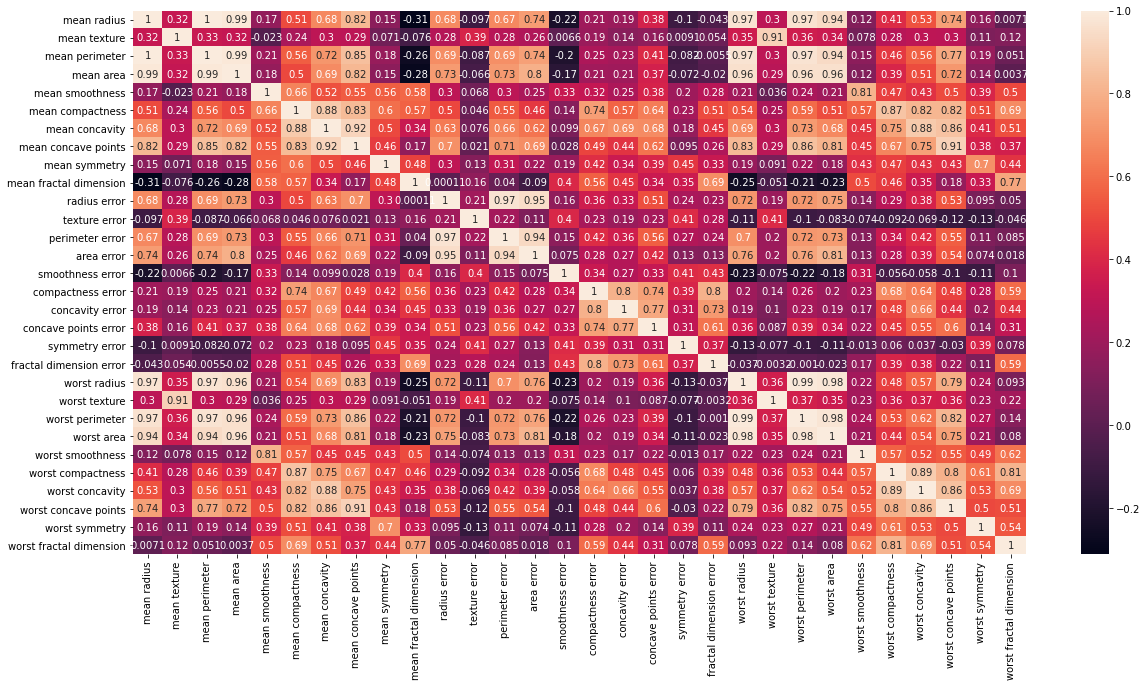

In [32]:
df_scaled_X = pd.DataFrame(scaled_X, columns = df.columns)
plt.figure(figsize = (20, 10))
sns.heatmap(df_scaled_X.corr(), annot = True)

In [ ]:
# Not: PCA features aralarındaki ilişkilere (correlation) göre gruplama yaparak component lar oluşturuyor. Oluşturulan componenet lar arasında correlation sıfırdır. Çünkü PCA features sayısını azaltarak veriyi componentler ile yeniden boyutlandırıyor ve boyut sayısını azaltıyor.   